In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('Fraud_check.csv',index_col=0)
data = data.reset_index()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
data = data.rename(columns = {'Marital.Status': 'MaritalStatus', 'Taxable.Income': 'TaxableIncome', 'City.Population': 'CityPopulation', 'Work.Experience': 'WorkExperience'}, inplace = False)
data.head()

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
le=LabelEncoder()
cols = [0, 1, 5]
for i in cols:
    data.iloc[:,i]=le.fit_transform(data.iloc[:,i])
data

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [6]:
data["TaxInc"] = pd.cut(data["TaxableIncome"], bins = [min(data.TaxableIncome),30000, max(data.TaxableIncome)], labels = ["Risky", "Good"])
data

,Undergrad,MaritalStatus,TaxableIncome,CityPopulation,WorkExperience,Urban,TaxInc
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Undergrad       600 non-null    int32   
 1   MaritalStatus   600 non-null    int32   
 2   TaxableIncome   600 non-null    int64   
 3   CityPopulation  600 non-null    int64   
 4   WorkExperience  600 non-null    int64   
 5   Urban           600 non-null    int32   
 6   TaxInc          599 non-null    category
dtypes: category(1), int32(3), int64(3)
memory usage: 21.9 KB


In [8]:
data = data.dropna()

In [9]:
X=data[["Undergrad","MaritalStatus","CityPopulation","WorkExperience","Urban"]]
Y=data['TaxInc']

In [10]:
data['TaxInc'].unique()

['Good', 'Risky']
Categories (2, object): ['Risky' < 'Good']

In [11]:
kfold=KFold()
kfold

KFold(n_splits=5, random_state=None, shuffle=False)

In [12]:
model = RandomForestClassifier()

In [13]:
results= cross_val_score(model, X, Y, cv=kfold)
results.mean()

0.7413025210084033

In [14]:
model.fit(X,Y)
model.feature_importances_

array([0.03959515, 0.07234274, 0.5413171 , 0.30704423, 0.03970079])

In [15]:
colname=["Undergrad","MaritalStatus","CityPopulation","WorkExperience","Urban"]
attributes=pd.Series(model.feature_importances_,index=colname)
attributes

Undergrad         0.039595
MaritalStatus     0.072343
CityPopulation    0.541317
WorkExperience    0.307044
Urban             0.039701
dtype: float64

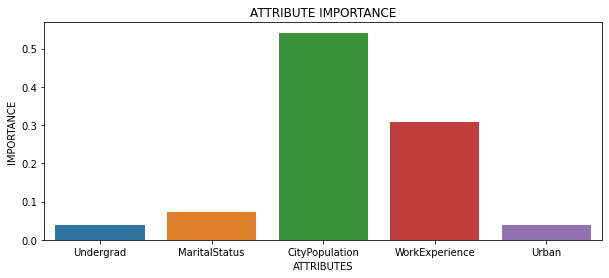

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
fig_dims = (10, 4)
_, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=attributes.index,y=attributes, ax=ax)
plt.xlabel("ATTRIBUTES")
plt.ylabel("IMPORTANCE")
plt.title("ATTRIBUTE IMPORTANCE")
plt.show()